# Iris Dataset analysis
# Our goal is to classify flowers in differnt catagory
### Download data from https://www.kaggle.com/uciml/iris
In this dataset will be having four independent features (Sepal length , Sepal width , Petal length and Petal width) and one dependent variable Flower type. Using the above information we will have to predict the class of any flowers given its Sepal length , Sepal width , Petal length and Petal width.
#### Can we classify flowers in different classes using these four features?? 
### Let's Explore the Iris dataset and draw conclusion

In [12]:
# importing important package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

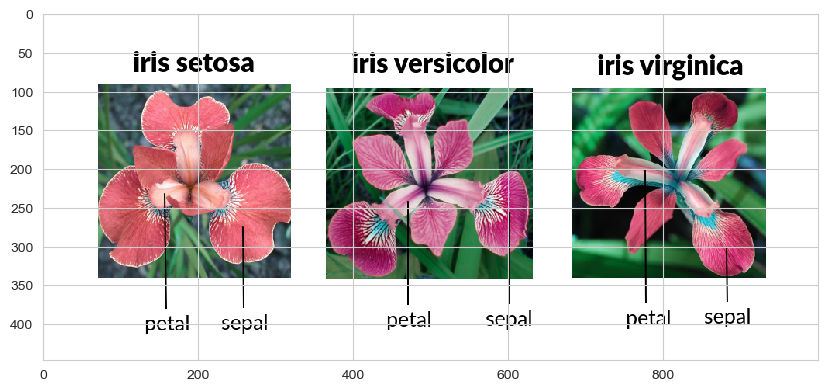

In [13]:
import cv2
img = cv2.imread('species.png')
fig=plt.figure(figsize=(10,7), dpi= 100, facecolor='w', edgecolor='k')
plt.imshow(img)

# OpenCV reads image as BGR and matplotlib reads as RGB 
## image must be converted to RGB before showning it using matplot

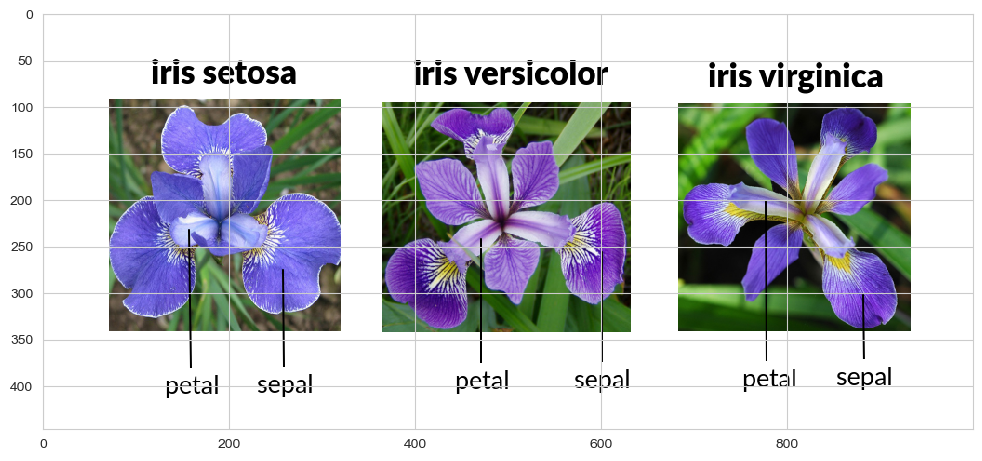

In [14]:
img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
plt.imshow(img_rgb)

In [15]:
# Loading dataset
try:
    iris = pd.read_csv('iris.csv')
except Exception as e:
    print("Can't load dataset... try again")

In [16]:
# getting propery of dataset
iris.shape

(150, 6)

In [17]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Describing properties of Iris dataset

In [100]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## We do not need feature Id, because it will not affect our dependent variable

In [18]:
iris = iris.drop(['Id'],axis=1)

In [19]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [20]:
# howmany datapoints for each class
iris['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

It is balanced dataset , each class have same number of data. Balance dataset is like if we have almost similar counts of each class, else Unbalanced dataset.

# 2-D scatter plot

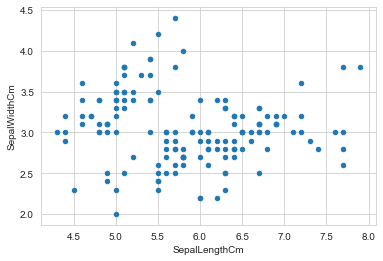

In [21]:
iris.plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm')

This is not good , because each datasets have same color , we can't classify, we need coloring of different species
# Color based on class ie: hue="Species"

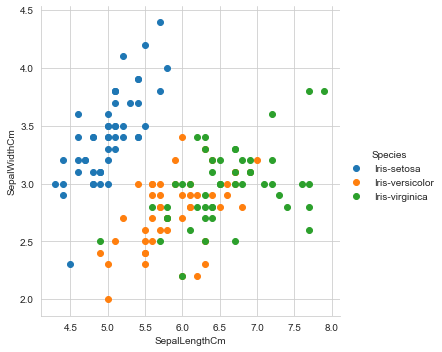

In [22]:
sns.set_style('whitegrid')
sns.FacetGrid(iris,hue='Species',size=5).map(plt.scatter,"SepalLengthCm","SepalWidthCm").add_legend()

# Observation 
<ul>
    <li>Most of the blue points(Setosa) are clustered together, we can easily classify Setosa.</li>
    <li>If sepal width is in range [3cm,4.5cm]  and sepal length is in range [4cm ,5.8cm] its is more likely to be Setosa.</li>
    <li>We can not confidently classify Virginica and Versicolor with Plot.</li>
</ul>

# Pair-Plot for analyzing more than 3-D datasets

C:\Users\Arpit\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


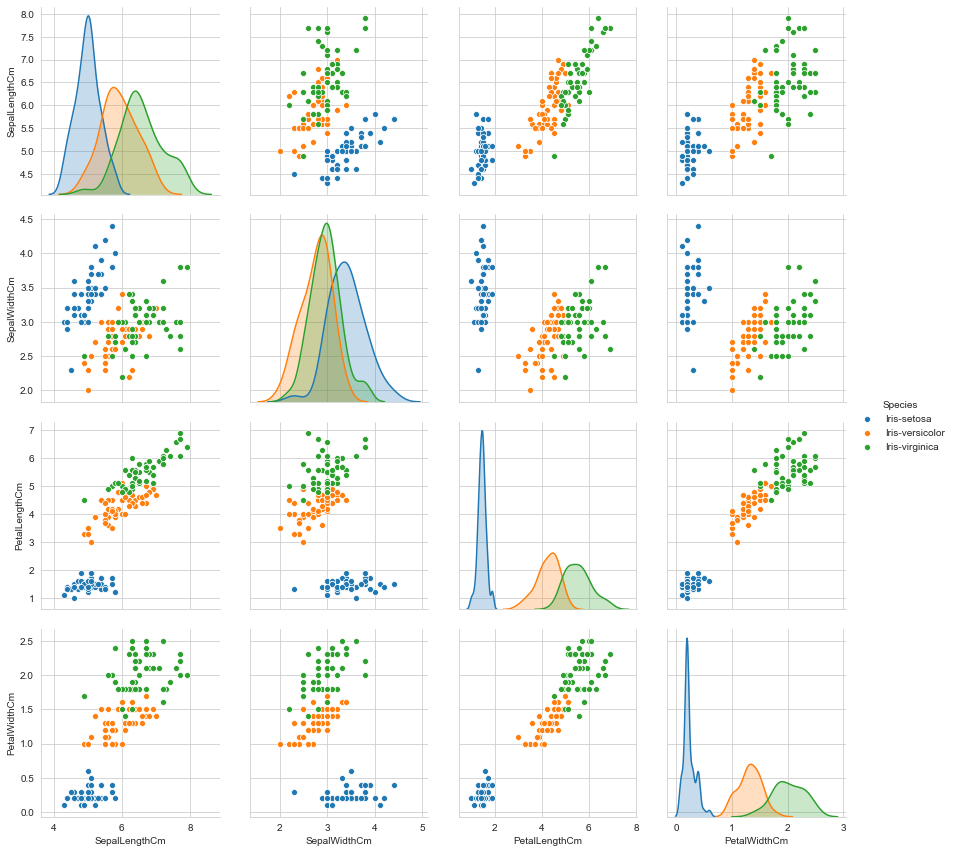

In [24]:
sns.set_style('whitegrid')
sns.pairplot(iris,hue='Species',size=3)
plt.show()

# Observation
<ul>
 <li> It is 4x4 matrix plot, diagonal plots are the PDF of corresponding features.</li>
 <li> We have 6 plots above diagonal and 6 bellow diagonal, if we observe they are similar, only their axis are interchanged(X vs Y bellow then Y vs X above).</li>
    <li>In most of the plots , blue points that is Setosa is linearly seperable(We can draw a line and seperate the Setosa class).</li>
        <li>If we have only 2 features PetalWidth and PetalLength, we can make a simple model using if else to seperate classes of flowers.</li>
        <li>If petalLength is in range [0.8cm,2cm] and Petal width is in range [0,1] is will be Setosa.</li>
    <li>Similarily we can classify Virginica and Virsicolor. </li>
    <li> If we have only Petal length we can classify setosa flowers and can classify others with some error.</li>
        
</ul>


# Histogram , PDF and CDF
If we have only one Features , then histogram and play vital role to decide and classify our results. Histogram is pictorial representation of data using bars of frequency. Histogram smoothing is called PDF and Area under the PDF curve at any point is CDF at that points.
### PDF is smoothed histogram using Kernel density Estimator


In [44]:
# Taking each class of flower in differnt variable
setosa = iris.loc[iris['Species']=='Iris-setosa']
virginica = iris.loc[iris['Species']=='Iris-virginica']
versicolor = iris.loc[iris['Species']=='Iris-versicolor']

## Ploting one-dim graph for each class ,for Petal length

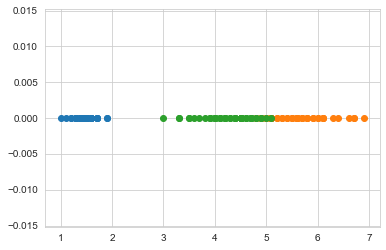

In [55]:
plt.scatter(setosa['PetalLengthCm'],np.zeros_like(setosa['PetalLengthCm']))
plt.scatter(virginica['PetalLengthCm'],np.zeros_like(setosa['PetalLengthCm']))
plt.scatter(versicolor['PetalLengthCm'],np.zeros_like(setosa['PetalLengthCm']))
plt.show()
# It is difficult to classify because most of the points are overlapping
# We have tp look for some better plots for this
# We will be using histogram

### Using better plotiing than this

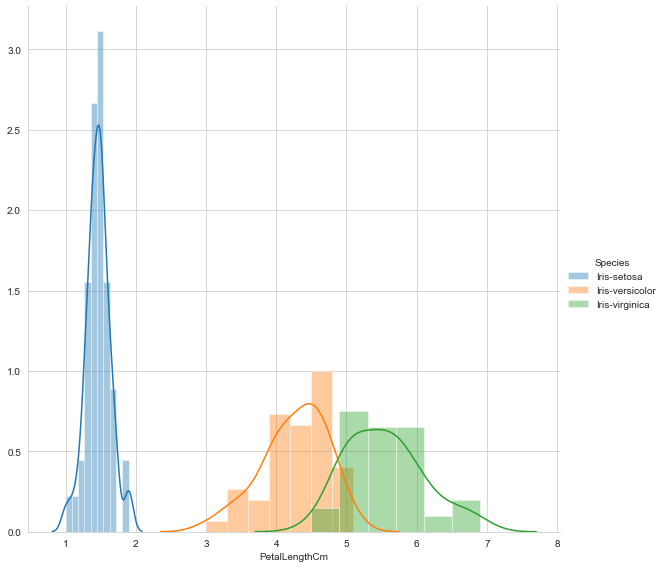

In [64]:
sns.FacetGrid(iris,hue='Species',size=8).map(sns.distplot,'PetalLengthCm').add_legend()
plt.show()

# Observation
<ul>
    <li>We can observe that the Petal lengths of all the class is Normally distributed</li>
    <li> Setosa have smallest average petal length and smallest variance, Virginica has maximum average petal length and variance. </li>
    <li> We can easily difine a linear boundary to classify flowers. </li>
</ul>

### There is a region of ambiguity between 4 cm and 6 cm , so we have to decide some criteria to classify flowers. lets say bellow 5cm versicolor and above 5cm virginica. (We can use Baye's decision rule for that)

# Box-plot

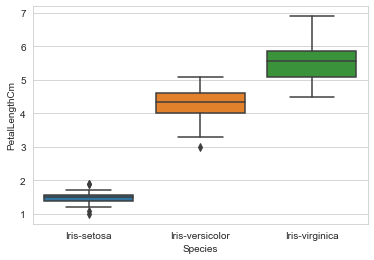

In [107]:
sns.boxplot(x='Species',y='PetalLengthCm',data=iris)

# Observation of Box-Plot
A box plot displays the five-number summary of given data. The five-number summary is the minimum, first quartile, median, third quartile, and maximum. A vertical line goes through the box at the median. The whiskers go from each quartile to the minimum or maximum.

In [113]:
setosa.describe()['PetalLengthCm']

count    50.000000
mean      1.464000
std       0.173511
min       1.000000
25%       1.400000
50%       1.500000
75%       1.575000
max       1.900000
Name: PetalLengthCm, dtype: float64

In [111]:
virginica.describe()['PetalLengthCm']

count    50.000000
mean      5.552000
std       0.551895
min       4.500000
25%       5.100000
50%       5.550000
75%       5.875000
max       6.900000
Name: PetalLengthCm, dtype: float64

In [112]:
versicolor.describe()['PetalLengthCm']

count    50.000000
mean      4.260000
std       0.469911
min       3.000000
25%       4.000000
50%       4.350000
75%       4.600000
max       5.100000
Name: PetalLengthCm, dtype: float64